In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models,transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torchsummary import summary

In [7]:
# MNIST
def mnist(batch_sz, valid_size=0.2, shuffle=True, random_seed=2000):
    num_classes = 10
    transform_train = transforms.Compose([
                        transforms.RandomCrop(28, padding=4),
                        transforms.ToTensor(),
                    ])
    
    
    transform_test = transforms.Compose([
                        transforms.ToTensor(),
                    ])
    

    # Training dataset
    train_data = MNIST(root='./datasets', train=True, download=True, transform=transform_train)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    if shuffle == True:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_sz ,pin_memory=True)

    # Test dataset
    test_data = MNIST(root='./datasets', train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_sz, shuffle=False, pin_memory=True)

    return train_loader, test_loader



In [8]:
batch_sz=64 # this is batch size i.e. the number of rows in a batch of data
train_loader, test_loader=mnist(batch_sz) 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



torch.Size([64, 1, 28, 28]) torch.Size([64])


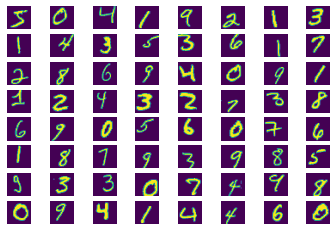

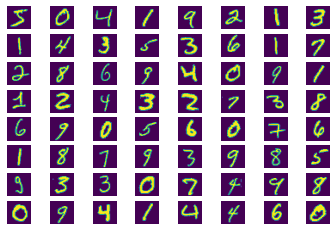

In [10]:
#Q1: Plot all the images of a training batch in a grid and verfiy that they are tranformed.
t1 = iter(train_loader)
batch = next(t1)

print((batch[0].shape), (batch[1].shape))

for i in range(batch_sz):
  plt.subplot(8, 8, i + 1)
  plt.imshow(batch[0][i, :, :, :].squeeze())
  
  plt.axis("off")
plt.figure()

# MNIST2-defined for checking
def mnist2(batch_sz, valid_size=0.2, shuffle=True, random_seed=2000):
    num_classes = 10
    transform_train = transforms.Compose([
                        #transforms.RandomCrop(28, padding=4),
                        #comment this line for creating data that are not cropped
                        transforms.ToTensor(),
                    ])
    
    
    transform_test = transforms.Compose([
                        transforms.ToTensor(),
                    ])
    

    # Training dataset
    train_data = MNIST(root='./datasets', train=True, download=True, transform=transform_train)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    if shuffle == True:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_sz ,pin_memory=True)

    # Test dataset
    test_data = MNIST(root='./datasets', train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_sz, shuffle=False, pin_memory=True)

    return train_loader, test_loader

train_loader2, test_loader2=mnist2(batch_sz) 

t2 = iter(train_loader2)
batch2 = next(t2)

for i in range(batch_sz):
  plt.subplot(8, 8, i + 1)
  plt.imshow(batch2[0][i, :, :, :].squeeze())
  
  plt.axis("off")

#Since the images get from the not randomcropped MNIST2 is different from the 
#cropped one, we can conclude that the pictures are transfromed

torch.Size([64, 1, 28, 28]) torch.Size([64])


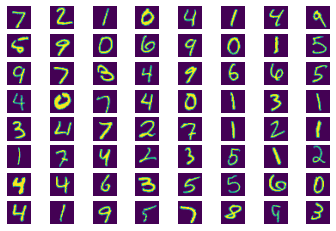

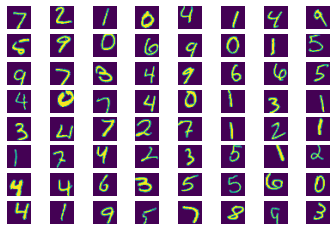

In [11]:
#Q2: Plot all the images of a test batch in a grid and verfiy that they are NOT tranformed.
t1 = iter(test_loader)
batch = next(t1)

print((batch[0].shape), (batch[1].shape))

for i in range(batch_sz):
  plt.subplot(8, 8, i + 1)
  plt.imshow(batch[0][i, :, :, :].squeeze())
  
  plt.axis("off")

plt.figure()
# MNIST3-defined for checking
def mnist3(batch_sz, valid_size=0.2, shuffle=True, random_seed=2000):
    num_classes = 10
    transform_train = transforms.Compose([
                        #transforms.RandomCrop(28, padding=4),
                        #comment this line for creating data that are not cropped
                        transforms.ToTensor(),
                    ])
    
    
    transform_test = transforms.Compose([
                        transforms.RandomCrop(28, padding=4),
                        #adding this line to crop the data
                        transforms.ToTensor(),
                    ])
    

    # Training dataset
    train_data = MNIST(root='./datasets', train=True, download=True, transform=transform_train)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    if shuffle == True:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_sz ,pin_memory=True)

    # Test dataset
    test_data = MNIST(root='./datasets', train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_sz, shuffle=False, pin_memory=True)

    return train_loader, test_loader

train_loader3, test_loader3=mnist3(batch_sz) 

t3 = iter(test_loader3)
batch3 = next(t3)

for i in range(batch_sz):
  plt.subplot(8, 8, i + 1)
  plt.imshow(batch3[0][i, :, :, :].squeeze())
  
  plt.axis("off")

#Since we can see the images are different from the cropped ones, we can 
#conclude that the pictures haven't been cropped. 

In [12]:
#Q3 NN: define a 2 layer simple NN for mnist digit classificaiton
class ANet (nn.Module):
  def __init__(self, ni, nh, no):
    super().__init__()
    self.l1 = nn.Linear(ni, nh)
    self.l2 = nn.Linear(nh, no)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.l1(x)
    x = torch.sigmoid(x)
    x = self.l2(x)
    return x
  

In [13]:
#Q4: Train the NN for 10 epochs and plot the loss and accuracy 
class ANet (nn.Module):
  def __init__(self, ni, nh, no):
    super().__init__()
    self.l1 = nn.Linear(ni, nh)
    self.l2 = nn.Linear(nh, no)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.l1(x)
    x = torch.sigmoid(x)
    x = self.l2(x)
    return x

#hyperparameters
ni = 28*28
nh = 100
no = 10

lr = 0.5
mm = 0.5
epochs = 10

ls = []
acc = []

#loss
device = torch.device("cuda:0")
net = ANet(ni, nh, no)
net = net.to(device)

optimizer = optim.SGD(net.parameters(), lr = lr, momentum = mm)

loss_fn = nn.CrossEntropyLoss()

#from: https://www.w3cschool.cn/article/22236097.html
def evaluteTop1(model, loader):
    model.eval()
    
    correct = 0
    total = len(loader.dataset)

    for x,y in loader:
        x,y = x.to(device), y.to(device)
        with torch.no_grad():
            logits = model(x)
            pred = logits.argmax(dim=1)
            correct += torch.eq(pred, y).sum().float().item()
    return correct / total
#End--------------------------------------------------------- 

for i in range(epochs):
  total_loss = 0
  for batch in train_loader:
    X, y = batch[0].to(device), batch[1].to(device)
    logits = net(X)
    loss = loss_fn(logits, y)
    total_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  temp = evaluteTop1(net, train_loader)
  acc.append(temp)
  ls.append(total_loss)
plt.plot(ls)

AssertionError: Torch not compiled with CUDA enabled

[]


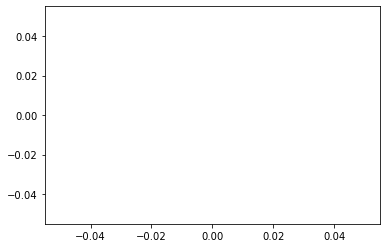

In [14]:
plt.plot(acc)
print(ls)

In [16]:
#Q5: Save the NN and load it with a new name verify that the 
#correct weights are loaded by comparing the bias terms of the last layer

torch.save(net, "test.py")
temp = torch.load("test.py")

print(temp.l2.bias)
print(net.l2.bias)

Parameter containing:
tensor([ 0.0336,  0.0055,  0.0661, -0.0989, -0.0387,  0.0459, -0.0023,  0.0848,
         0.0650, -0.0294], requires_grad=True)
Parameter containing:
tensor([ 0.0336,  0.0055,  0.0661, -0.0989, -0.0387,  0.0459, -0.0023,  0.0848,
         0.0650, -0.0294], requires_grad=True)


In [17]:
#Q6: For the incorrectly labelled images collect all the images, 
#true label and predicted label in three lists. 
wrong_images = []
true_labels = []
predicted_labels = []

for batch in test_loader:
  X, y = batch[0].to(device), batch[1].to(device)
  logtis = net(X)
  for k in range(logtis.shape[0]):
    if (y[k] != torch.argmax(logtis[k])):
      wrong_images.append(X[k].reshape(28,28))
      true_labels.append(y[k])
      predicted_labels.append(torch.argmax(logtis[k]))
print(len(wrong_images), len(true_labels), len(predicted_labels))     

AssertionError: Torch not compiled with CUDA enabled

In [18]:
#Q7: Plot the first 10 incorrectly labeled images, 
#their true and predicted label should be in title of the plot.

for i in range(10):
  temp = wrong_images[i].cpu()
  plt.imshow(temp, "Greys")
  plt.title(f"The label is:  {true_labels[i]}  Wrong label is:  {predicted_labels[i]}")
  plt.axis("off")
  plt.figure()

IndexError: list index out of range